## Assignment- Crime data
Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
crime=pd.read_csv("c:/users/mahesh/datasetcsv/crime_data.csv")

In [3]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# Data preprocessing

In [4]:
crime.rename( columns={'Unnamed: 0' :'States'}, inplace=True )

In [5]:
crime

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [6]:
crime1=crime.iloc[:,1:]

In [7]:
crime1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [8]:
crime_data=crime.iloc[:,1:]

In [9]:
crime_data

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


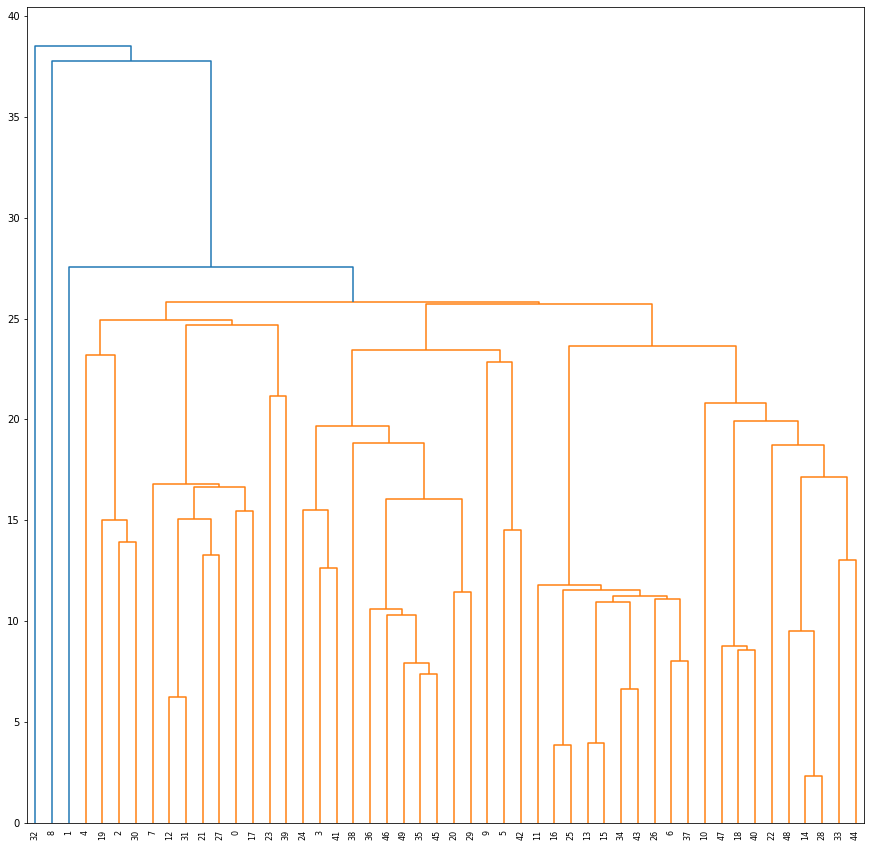

In [10]:
# create dendrogram
plt.figure(figsize=(15,15))
dendrogram = sch.dendrogram(sch.linkage(crime_data, method='single'))

In [11]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')

In [12]:
# save clusters for chart
y_hc = hc.fit_predict(crime_data)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [13]:
crime_data['Cluster']=Clusters

In [14]:
crime_data

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,0


# Clustering using K means

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [16]:
km=crime_data.iloc[:,0:4]

In [17]:
km

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

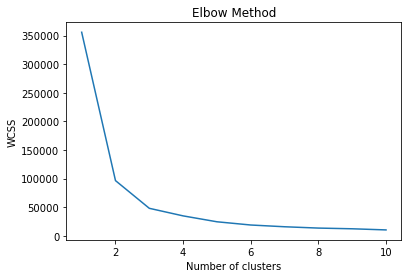

In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(km)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(km)

KMeans(n_clusters=5, random_state=42)

In [20]:
clusters_new.labels_

array([0, 0, 4, 3, 0, 3, 1, 0, 4, 3, 2, 1, 0, 1, 2, 1, 1, 0, 2, 4, 3, 0,
       2, 0, 3, 1, 1, 0, 2, 3, 0, 0, 4, 2, 1, 3, 3, 1, 3, 0, 2, 3, 3, 1,
       2, 3, 3, 2, 2, 3])

In [21]:
#Assign clusters to the data set
km['clusterid_new'] = clusters_new.labels_

In [22]:
km

,Murder,Assault,UrbanPop,Rape,clusterid_new
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,4
3,8.8,190,50,19.5,3
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,4
9,17.4,211,60,25.8,3


In [23]:
km.sort_values(by=["clusterid_new"]) 

,Murder,Assault,UrbanPop,Rape,clusterid_new
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
39,14.4,279,48,22.5,0
4,9.0,276,91,40.6,0
31,11.1,254,86,26.1,0
30,11.4,285,70,32.1,0
7,5.9,238,72,15.8,0
27,12.2,252,81,46.0,0
23,16.1,259,44,17.1,0
12,10.4,249,83,24.0,0


In [24]:
km.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,11.766667,257.916667,68.416667,28.933333
1,1,5.590000,112.400000,65.600000,17.270000
2,2,2.950000,62.700000,53.900000,11.510000
3,3,8.214286,173.285714,70.642857,22.842857
4,4,11.950000,316.500000,68.000000,26.700000


In [25]:
plot=km.groupby('clusterid_new').agg(['mean']).reset_index()

In [26]:
plot

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,11.766667,257.916667,68.416667,28.933333
1,1,5.590000,112.400000,65.600000,17.270000
2,2,2.950000,62.700000,53.900000,11.510000
3,3,8.214286,173.285714,70.642857,22.842857
4,4,11.950000,316.500000,68.000000,26.700000


In [27]:
list(enumerate(km.columns))

[(0, 'Murder'),
 (1, 'Assault'),
 (2, 'UrbanPop'),
 (3, 'Rape'),
 (4, 'clusterid_new')]

## DBscan clustering 

In [28]:
db=crime1

In [29]:
db

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [30]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
dbscan = DBSCAN(eps=0.5, min_samples=6)
dbscan.fit(db)

DBSCAN(min_samples=6)

In [32]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [33]:
db['dbcluster']=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [34]:
db

,Murder,Assault,UrbanPop,Rape,dbcluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,-1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


## Comparison of Hierarchical, kmeans and dbscan clustering techniques

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


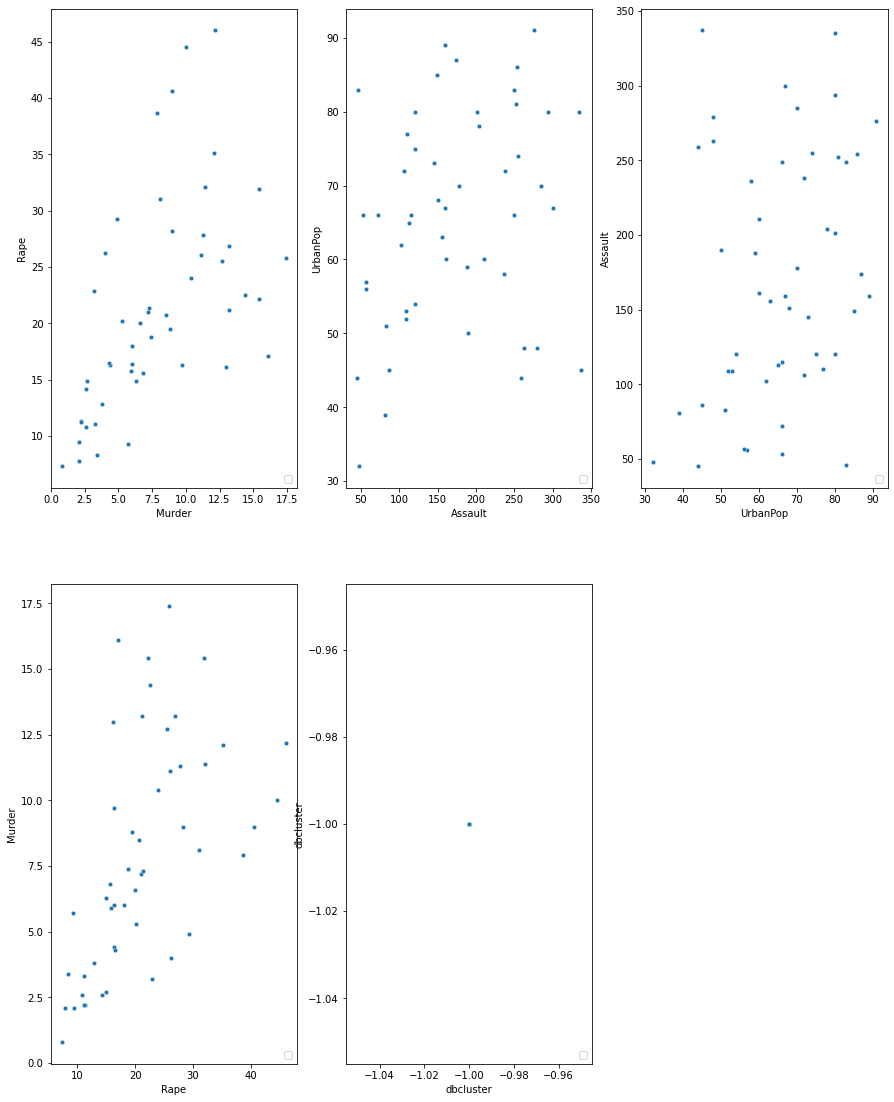

In [35]:
plt.figure(figsize=(15,30))
n=0
m=3  
for i in enumerate(crime1.columns):
        
    plt.subplot(3,3,i[0]+1)
    cr=crime1.columns
    sns.scatterplot(x=cr[n],y=cr[m], hue=None, 
    data=crime1, palette='dark', s=20);
    plt.legend(loc='lower right');
    plt.legend(loc='lower right');
    n=n+1
    m=m-1

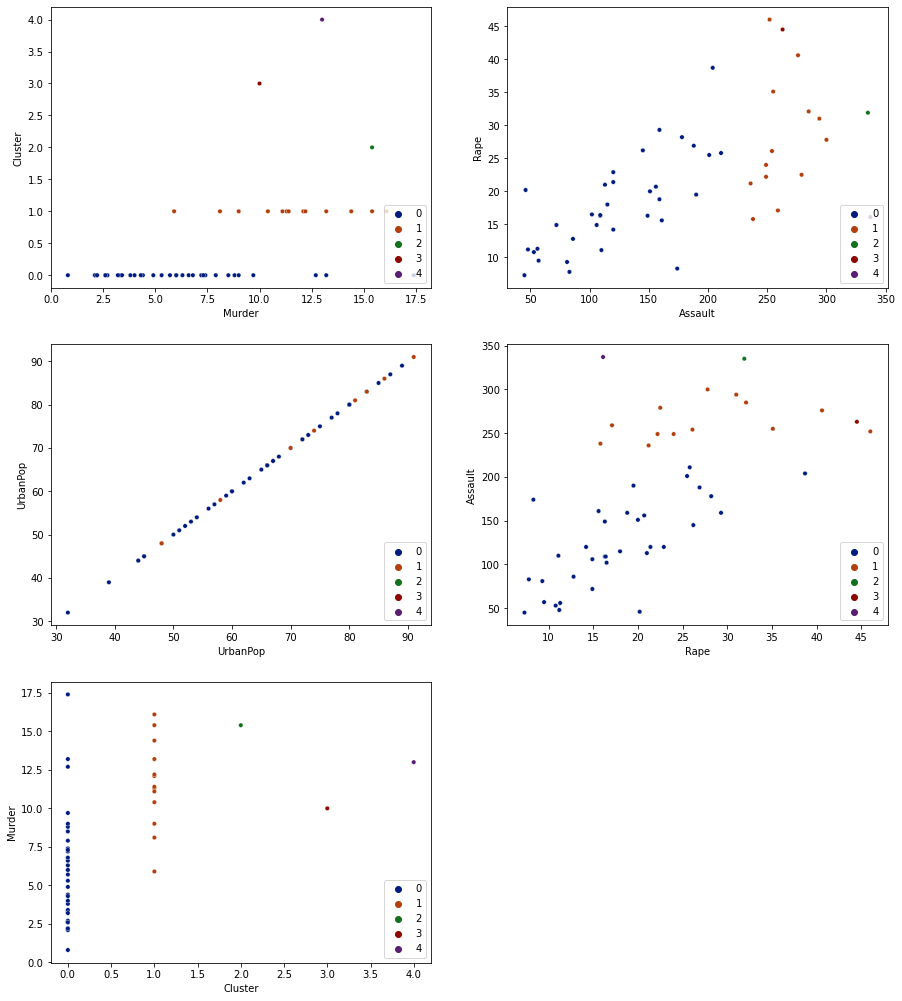

In [37]:
plt.figure(figsize=(15,30))
n=0
m=4  
for i in enumerate(crime_data.columns):
        
    plt.subplot(5,2,i[0]+1)
    cr=crime_data.columns
    sns.scatterplot(x=cr[n],y=cr[m], hue="Cluster", 
    data=crime_data, palette='dark', s=20);
    plt.legend(loc='lower right');
    plt.legend(loc='lower right');
    n=n+1
    m=m-1

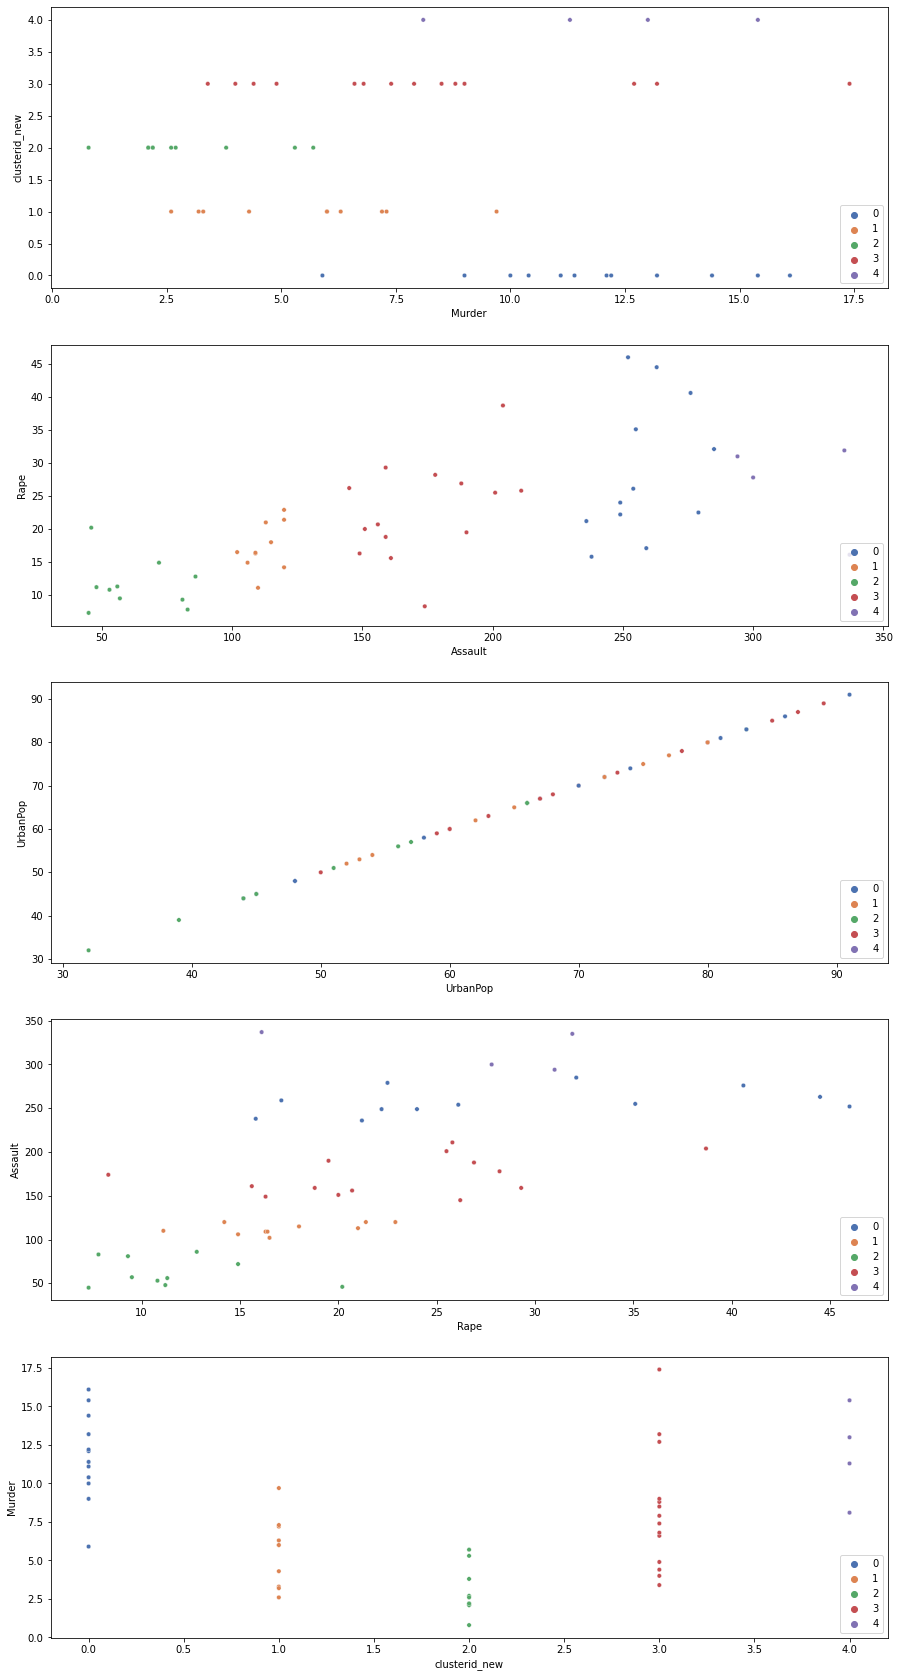

In [38]:
plt.figure(figsize=(15,30))
n=0
m=4 
for i in enumerate(km.columns):
        
    plt.subplot(5,1,i[0]+1)
    cr=km.columns
    sns.scatterplot(x=cr[n],y=cr[m], hue="clusterid_new", 
    data=km, palette='deep', s=20);
    plt.legend(loc='lower right');
    plt.legend(loc='lower right');
    n=n+1
    m=m-1

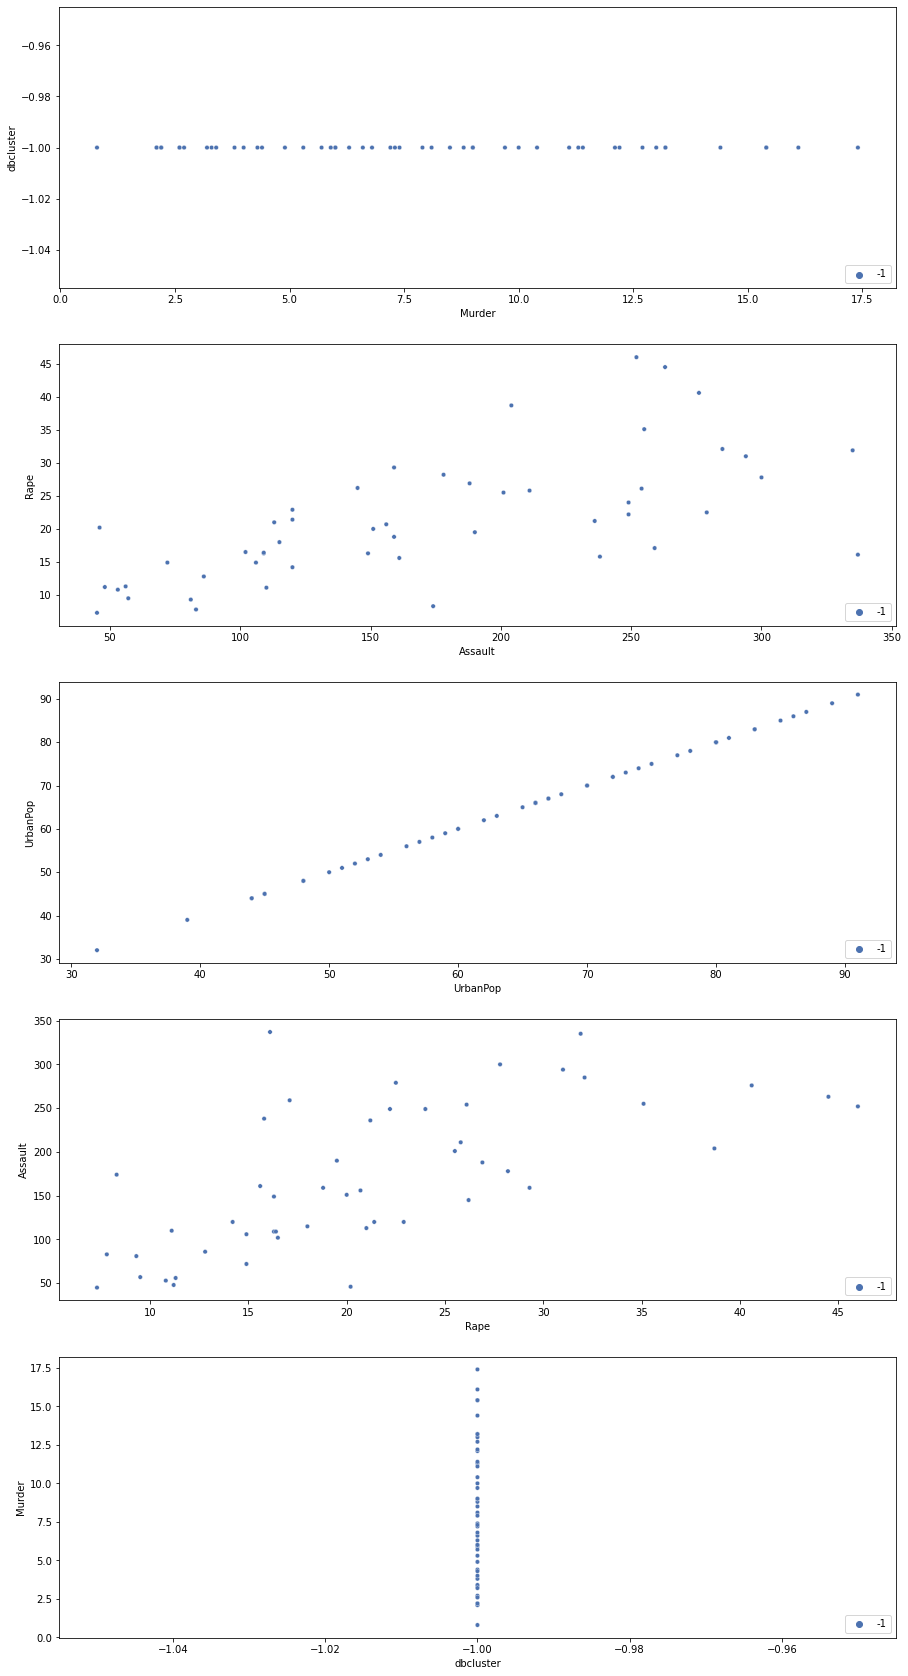

In [39]:
plt.figure(figsize=(15,30))
n=0
m=4 
for i in enumerate(db.columns):
        
    plt.subplot(5,1,i[0]+1)
    cr=db.columns
    sns.scatterplot(x=cr[n],y=cr[m], hue="dbcluster", 
    data=db, palette='deep', s=20);
    plt.legend(loc='lower right');
    plt.legend(loc='lower right');
    n=n+1
    m=m-1